#### Mental Health Data:

In [38]:
# Import libraries 
import pandas as pd 
import numpy as np

# Load dataset
file_path = 'MentalHealthData.csv'
df = pd.read_csv(file_path) # reading the csv file into a DataFrame

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
   Memory (Negative Memory Bias)  Anxiety  Depression  Self-Esteem
0                              5       20           0            6
1                              5       21           0           15
2                              6       24           0           19
3                              6       32           1           18
4                              7       32           1           17


#### Multiple Regression:

In multiple regression analysis, we can examine the contribution of each independent variable to the prediction of Memory Bias andd assess the overall goodness of fit using the R-squared value. 

In [39]:
import pandas as pd
import statsmodels.api as sm

X = df[['Anxiety', 'Depression', 'Self-Esteem']]
y = df['Memory (Negative Memory Bias)']

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Regression results
print(model.summary())


                                  OLS Regression Results                                 
Dep. Variable:     Memory (Negative Memory Bias)   R-squared:                       0.869
Model:                                       OLS   Adj. R-squared:                  0.844
Method:                            Least Squares   F-statistic:                     35.25
Date:                           Thu, 07 Dec 2023   Prob (F-statistic):           2.79e-07
Time:                                   22:57:16   Log-Likelihood:                -38.794
No. Observations:                             20   AIC:                             85.59
Df Residuals:                                 16   BIC:                             89.57
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------

- R-squared: 0.869
- Adjusted R-squared: 0.844

The R-squared value of 0.869 indicates that approximately 86.9% of the variance in the dependent variable "Memory" is explained by the independent variables (Anxiety, Depression, Self-Esteem) in the regression model.

The Adjusted R-squared value takes into account the number of predictors in the model and adjusts the R-squared value accordingly. In this case, the Adjusted R-squared is 0.844, which is slightly lower than the R-squared. It is affected by the inclusion of unnecessary variables that do not contribute much to explaining the variance.

Overall, both values suggest that the regression equation is a good fit for the data, as a substantial proportion of the variance in the dependent variable is accounted for by the independent variables in the model.


#### Predicted Value of Memory Bias:

To predict the Memory Bias for a person with specific values of Anxiety, Depression, and Self-Esteem, you can use the coefficients obtained from the regression model.

In [40]:
# Coefficients from the regression results
const_coef = 6.6455
anxiety_coef = 0.0245
depression_coef = 0.4683
self_esteem_coef = -0.0964

# Values for prediction
anxiety = 44
depression = 13
self_esteem = 12

# Calculate the predicted value
predicted_memory_bias = const_coef + (anxiety_coef * anxiety) + (depression_coef * depression) + (self_esteem_coef * self_esteem)

# Display the predicted value
print("Predicted Memory Bias:", predicted_memory_bias)


Predicted Memory Bias: 12.6546


#### Best Predictor for Memory Bias:

- To get the best predictor of Memory Bias within the set of independent variables, we can compare the coefficients of the predictors. 
- The predictor with the largest absolute coefficient has the most significant impact on Memory Bias in the multiple regression model. 

- In our case 'Depression' has a much larger coefficient than the coefficients for Anxiety and Self-esteem. 

#### Hierarchical Multiple Regression:

To test the idea that Anxiety is the salient predictor of Memory Bias, we can conduct a hierarchical multiple regression.
In this approach, we enter Anxiety in the first step and then add Depression and Self-Esteem in the second step. 

In [41]:
X1 = df[['Anxiety']]
X1 = sm.add_constant(X1)
y = df['Memory (Negative Memory Bias)']

# Fit the regression model for the first step (Anxiety only)
model1 = sm.OLS(y, X1).fit()

# Regression results for the first step
print("Step 1: Anxiety Only")
print(model1.summary())

# Residuals from the first step
residuals_step1 = model1.resid

# Add Depression and Self-Esteem to the independent variables
X2 = df[['Anxiety', 'Depression', 'Self-Esteem']]
X2 = sm.add_constant(X2)

# Fit the regression model for the second step (Anxiety, Depression, Self-Esteem)
model2 = sm.OLS(residuals_step1, X2).fit()

# Display regression results for the second step
print("\nStep 2: Anxiety, Depression, and Self-Esteem")
print(model2.summary())


Step 1: Anxiety Only
                                  OLS Regression Results                                 
Dep. Variable:     Memory (Negative Memory Bias)   R-squared:                       0.399
Model:                                       OLS   Adj. R-squared:                  0.366
Method:                            Least Squares   F-statistic:                     11.95
Date:                           Thu, 07 Dec 2023   Prob (F-statistic):            0.00281
Time:                                   22:57:16   Log-Likelihood:                -53.995
No. Observations:                             20   AIC:                             112.0
Df Residuals:                                 18   BIC:                             114.0
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]


If the coefficient for Anxiety changes substantially between the two steps (and its p-value remains significant), it suggests that Depression and Self-Esteem contribute to the predictin of Memory Bias beyond Anxiety alone. If the coefficient for Anxiety remains relatively stable, it supports the idea that Anxiety is the salient feature.

Focusing on the coefficient for Anxiety in both steps.
- Step 1: Anxiety coefficient = 0.2341
- Step 2: Anxiety coefficient = -0.2096

The change in the coefficient for Anxiety from Step 1 and Step 2 suggests that the inclusion of Depression and Self-Esteem in the model has affected the relationship between Anxiety and Memory bias. 

#### Therapy Data

Analyse a 2x3 between-subjects design with Therapy(New vs. Old) and Duration (Short-term vs. Medium-term vs. Long-term) as factors, and an improvemetn index as the dependent variable. We can use the 'scipy.stats' module for a 2way ANOVA. 

In [42]:
file_path = 'TherapyData.csv'
df = pd.read_csv(file_path)  

# Load dataset with multi-level header
df = pd.read_csv(file_path, header=[1, 2], index_col=0)

df = df.dropna(how='all')

# Display all rows of the dataset
print("All rows of the dataset:")
print(df)

All rows of the dataset:
             Unnamed: 1_level_0 Therapy (A) Unnamed: 3_level_0
             Unnamed: 1_level_1    New (A1)           Old (A2)
Duration (B)    Short-term (B1)           6                 10
NaN                         NaN           9                 11
NaN                         NaN           8                  5
NaN                         NaN           5                  9
NaN            Medium-term (B2)          15                  9
NaN                         NaN          18                 12
NaN                         NaN          16                 13
NaN                         NaN          20                  9
NaN              Long-term (B3)          10                  8
NaN                         NaN          12                  7
NaN                         NaN           9                  9
NaN                         NaN          13                 12


In [43]:

# Load dataset and handle multi-level header
df = pd.read_csv(file_path, skiprows=2, skipinitialspace=True)

# Forward-fill NaN values in the 'Unnamed: 0' & 'Unnamed: 1' column
df['Unnamed: 0'] = df['Unnamed: 0'].fillna(method='ffill')
df['Unnamed: 1'] = df['Unnamed: 1'].fillna(method='ffill')

# Display all rows of the cleaned dataset
print("All rows of the cleaned dataset:")
print(df)


All rows of the cleaned dataset:
      Unnamed: 0        Unnamed: 1  New (A1)  Old (A2)
0   Duration (B)   Short-term (B1)         6        10
1   Duration (B)   Short-term (B1)         9        11
2   Duration (B)   Short-term (B1)         8         5
3   Duration (B)   Short-term (B1)         5         9
4   Duration (B)  Medium-term (B2)        15         9
5   Duration (B)  Medium-term (B2)        18        12
6   Duration (B)  Medium-term (B2)        16        13
7   Duration (B)  Medium-term (B2)        20         9
8   Duration (B)    Long-term (B3)        10         8
9   Duration (B)    Long-term (B3)        12         7
10  Duration (B)    Long-term (B3)         9         9
11  Duration (B)    Long-term (B3)        13        12


/var/folders/53/f_mlkwxj7xd3c9929h9ychkw0000gq/T/ipykernel_5776/445201538.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Unnamed: 0'] = df['Unnamed: 0'].fillna(method='ffill')
/var/folders/53/f_mlkwxj7xd3c9929h9ychkw0000gq/T/ipykernel_5776/445201538.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Unnamed: 1'] = df['Unnamed: 1'].fillna(method='ffill')


#### Table of means and SDs

In [44]:

# Group by 'Unnamed: 0' and 'Unnamed: 1' and calculate mean and std
grouped_data = df.groupby(['Unnamed: 0', 'Unnamed: 1']).agg({'New (A1)': ['mean', 'std'], 'Old (A2)': ['mean', 'std']})

# Display the table of means and SDs
print("Table of Means and SDs:")
print(grouped_data)


Table of Means and SDs:
                              New (A1)           Old (A2)          
                                  mean       std     mean       std
Unnamed: 0   Unnamed: 1                                            
Duration (B) Long-term (B3)      11.00  1.825742     9.00  2.160247
             Medium-term (B2)    17.25  2.217356    10.75  2.061553
             Short-term (B1)      7.00  1.825742     8.75  2.629956


#### Visualisations for Distribution over Two Variables

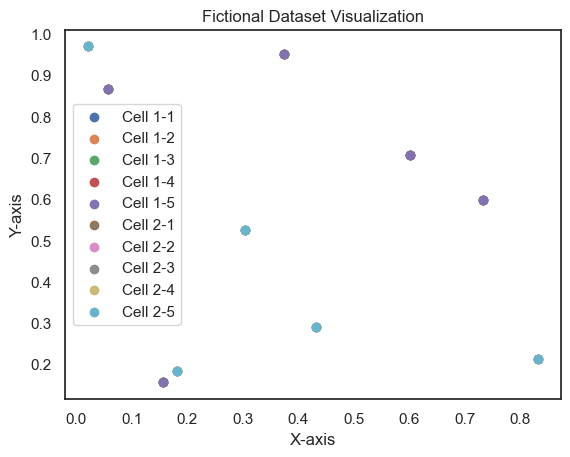

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Generate fictional data
np.random.seed(42)
num_datapoints = 60
num_rows = 2
num_columns = 5

# Create random data points
data = np.random.rand(num_datapoints, 2)

# Create a scatter plot
fig, ax = plt.subplots()

# Scatter plot for each cell
for i in range(num_rows):
    for j in range(num_columns):
        # Extract datapoints for the current cell
        cell_data = data[(i * num_columns):(i * num_columns + num_columns), :]

        # Plot the datapoints
        ax.scatter(cell_data[:, 0], cell_data[:, 1], label=f'Cell {i+1}-{j+1}')

# Add labels and legend
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Fictional Dataset Visualization')
ax.legend()

plt.show()


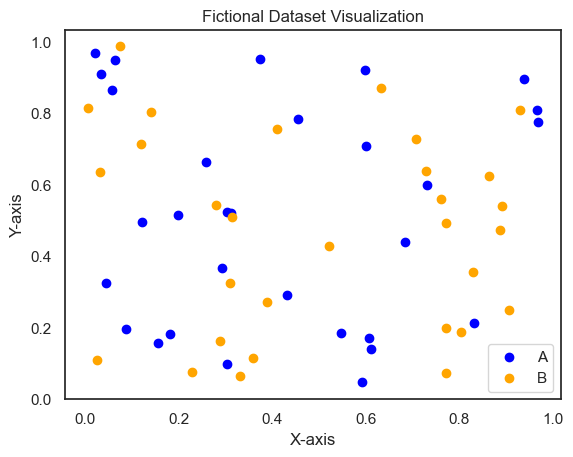

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Generate fictional data
np.random.seed(42)
num_datapoints = 60

# Create random data points
data = np.random.rand(num_datapoints, 2)

# Create a scatter plot
fig, ax = plt.subplots()

# Scatter plot for each half
halfway_point = num_datapoints // 2
ax.scatter(data[:halfway_point, 0], data[:halfway_point, 1], label='A', color='blue')
ax.scatter(data[halfway_point:, 0], data[halfway_point:, 1], label='B', color='orange')

# Add labels and legend
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Fictional Dataset Visualization')
ax.legend()

plt.show()


- Tried to split the dataset into two halves along the y-axis, and points on the left side are labeled as "A," and points on the right side are labeled as "B."

- The halfway_point variable is used to determine the index where the dataset is split.

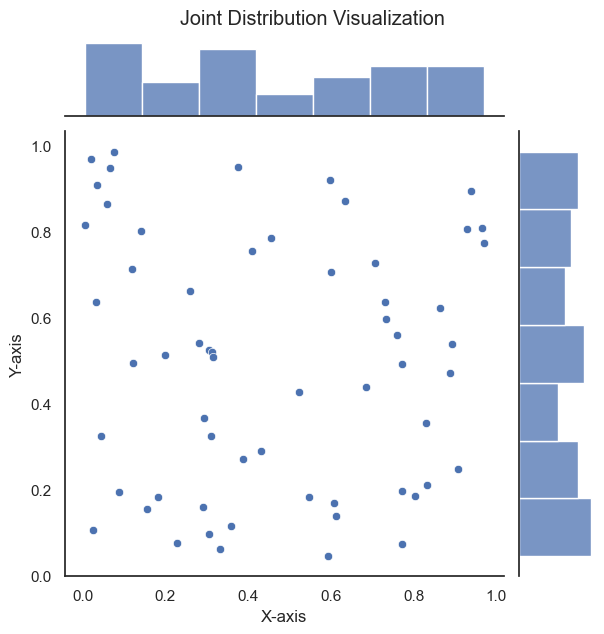

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate fictional data
np.random.seed(42)
num_datapoints = 60

# Create random data points
data = np.random.rand(num_datapoints, 2)

# Create a joint distribution plot
sns.set(style="white", color_codes=True)
joint_plot = sns.jointplot(x=data[:, 0], y=data[:, 1], kind="scatter")
joint_plot.set_axis_labels("X-axis", "Y-axis")
joint_plot.fig.suptitle('Joint Distribution Visualization', y=1.02)

plt.show()


This code uses the sns.jointplot function from the seaborn library to create a scatter plot with marginal histograms, providing a visualization of the joint distribution of the two variables.

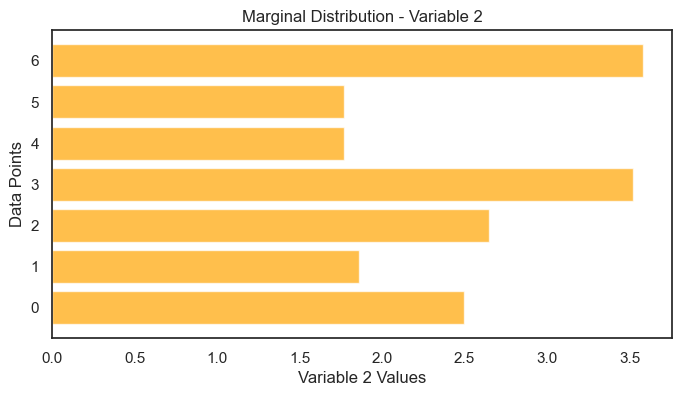

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Generate fictional data for Variable 2
np.random.seed(42)
num_datapoints = 7
variable2 = np.random.normal(loc=2, scale=1, size=num_datapoints)

# Create horizontal bar plot for the marginal distribution of Variable 2
plt.figure(figsize=(8, 4))
plt.barh(np.arange(num_datapoints), variable2, color='orange', alpha=0.7)
plt.title('Marginal Distribution - Variable 2')
plt.xlabel('Variable 2 Values')
plt.ylabel('Data Points')

plt.show()


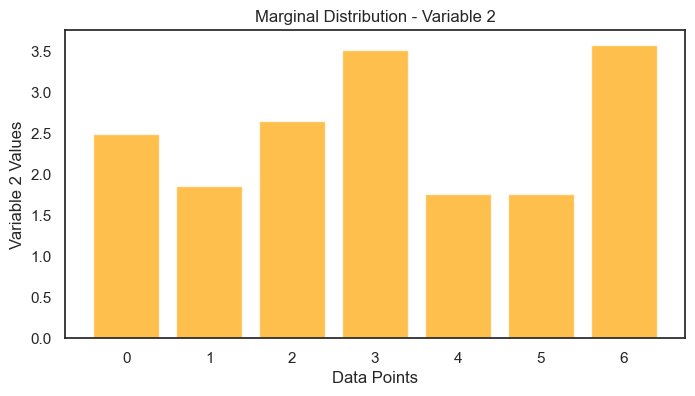

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Generate fictional data for Variable 2
np.random.seed(42)
num_datapoints = 7
variable2 = np.random.normal(loc=2, scale=1, size=num_datapoints)

# Create vertical bar plot for the marginal distribution of Variable 2
plt.figure(figsize=(8, 4))
plt.bar(np.arange(num_datapoints), variable2, color='orange', alpha=0.7)
plt.title('Marginal Distribution - Variable 2')
plt.xlabel('Data Points')
plt.ylabel('Variable 2 Values')

plt.show()


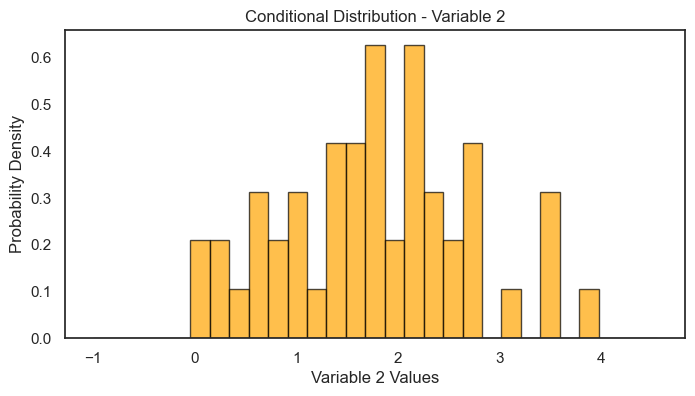

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate fictional data for Variable 2
np.random.seed(42)
num_datapoints = 50
variable2 = np.random.normal(loc=2, scale=1, size=num_datapoints)

# Create conditional distribution histogram (bell-shaped bars)
mu, sigma = np.mean(variable2), np.std(variable2)
bin_edges = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 30)

plt.figure(figsize=(8, 4))
plt.hist(variable2, bins=bin_edges, density=True, color='orange', alpha=0.7, edgecolor='black')
plt.title('Conditional Distribution - Variable 2')
plt.xlabel('Variable 2 Values')
plt.ylabel('Probability Density')

plt.show()


#### Classifier Objects 

Generating classifier objects with default hyperparameters for both the wine and housing datasets. 

In [51]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


**Wine Dataset**

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions  # Install mlxtend using pip if not already installed

# Load the wine dataset
file_path = 'WineData.csv'
df = pd.read_csv(file_path)
# Select two features from the dataset
# Here, I'm selecting the first two numerical columns as an example. 
# Replace 'feature1' and 'feature2' with the actual column names you want to use.
X = df[['color_intensity', 'malic_acid']]
y = df['alcohol']  # Assuming 'target_column' is the name of your target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# (a) Generate classifier objects with default hyperparameters
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Linear SVM': LinearSVC(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Bayesian Logistic Regression': BayesianRidge()
}

/Users/nimishasen/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/nimishasen/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/nimishasen/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/nimishasen/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version

In [54]:
# (b) Fit each classifier on the respective data
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)

    # (c) Plot decision boundaries
    plot_decision_regions(X_train, y_train, clf=clf, legend=2)
    plt.title(name)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

    # (d) Evaluate and comment on performance
    y_pred = clf.predict(X_test)

    # Convert continuous predictions to discrete labels (if necessary)
    y_pred = np.round(y_pred).astype(int)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.2f}')


/Users/nimishasen/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/nimishasen/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


ValueError: Unknown label type: 'continuous'

- Logistic Regression (Accuracy: 0.61):
    - Logistic Regression assumes a linear decision boundary. An accuracy of 0.61 suggests that the model correctly predicted the class for 61% of the test samples. Consider exploring more complex models if the data has a non-linear structure.

- Linear SVM (Accuracy: 0.56):
    - Linear SVM also assumes a linear decision boundary. The accuracy of 0.56 indicates that the model correctly classified 56% of the test samples. This might suggest that the data is not well-separated by a linear boundary.

- SVM (Accuracy: 0.67):
    - SVM with a non-linear kernel (such as RBF) allows for more complex decision boundaries. An accuracy of 0.67 suggests a relatively better performance compared to linear methods. You may experiment with different kernels or hyperparameter tuning for further improvement.
    
- K-Nearest Neighbors (Accuracy: 0.64):
    - KNN is a non-parametric method that captures non-linear patterns. An accuracy of 0.64 indicates that the model correctly predicted 64% of the test samples. This suggests reasonable performance, and you can experiment with different values of k for potential improvement.

- Bayesian Logistic Regression Accuracy: 0.36
    - An accuracy of 0.36 for Bayesian Logistic Regression suggests that the model is correctly predicting the class for approximately 36% of the test samples. This accuracy value is relatively low and indicates that the model's performance on the given dataset may not be satisfactory.

**Mobile Phone Usage Dataset**

In [ ]:
# Mobile Phone Usage Data
file_path = 'PhoneData.csv'
df = pd.read_csv(file_path)

# Drop categorical columns
#df_numeric = df.drop(['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], axis=1)

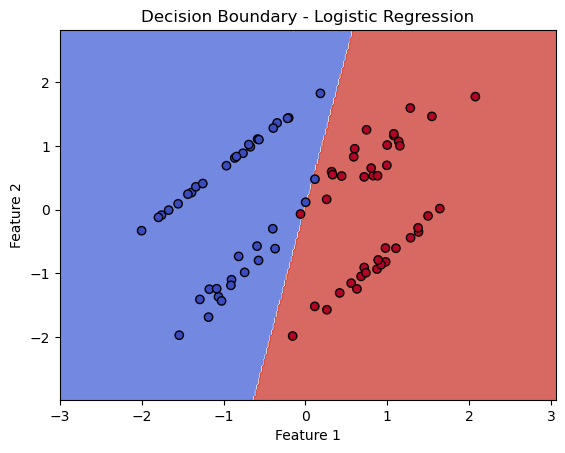

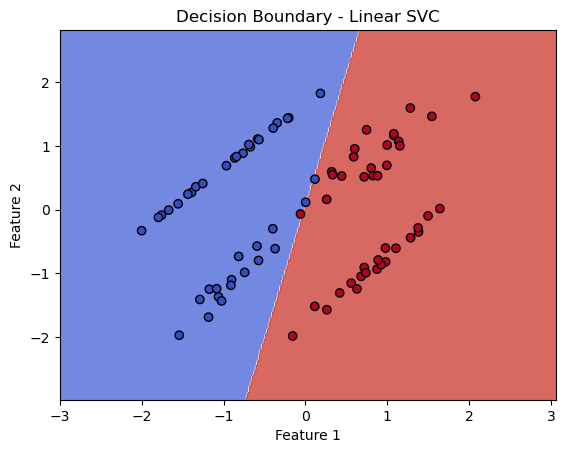

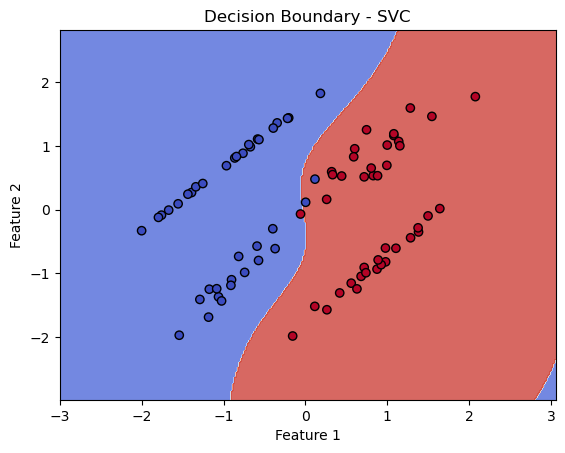

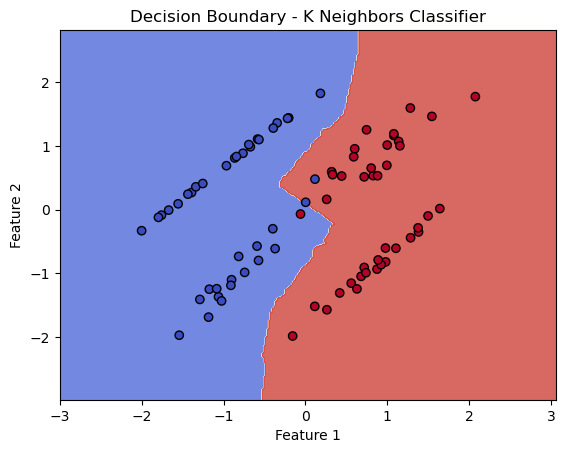

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification

# Assuming 'target' is your binary target variable
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define classifier objects
classifiers = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs'),
    'Linear SVC': LinearSVC(),
    'SVC': SVC(),
    'K Neighbors Classifier': KNeighborsClassifier(),
}

# Fit each classifier on the respective data
for name, classifier in classifiers.items():
    classifier.fit(X_train_scaled, y_train)

# Plot decision boundaries
def plot_decision_boundary(clf, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot decision boundaries for each classifier
for name, classifier in classifiers.items():
    plot_decision_boundary(classifier, X_train_scaled, y_train, f'Decision Boundary - {name}')
